In [1]:
#import ALL THE THINGS

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import os
import feather
import datetime

from ema_workbench import (Model, 
                           RealParameter, 
                           Constant,
                           TimeSeriesOutcome,
                           perform_experiments, 
                           ema_logging, 
                           save_results,
                           perform_experiments, 
                           ema_logging)

#from ema_workbench.em_framework import samplers

from ema_workbench.connectors.vensim import VensimModel

#from ema_workbench.em_framework.evaluators import LHS, MC

import ema_workbench.analysis.pairs_plotting as pairs
import ema_workbench.analysis.plotting as emaplt

# turn on logging
ema_logging.log_to_stderr(ema_logging.INFO)

C:\Users\Patrick\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:29: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Users\Patrick\Anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:18: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
C:\Users\Patrick\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Patrick\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


<Logger EMA (DEBUG)>

In [11]:
def export_outcomes(outcomes, location = './Data/' ):
    """takes EMA outcomes and exports all time series for each outcome of interest as a .feather dataframe for easy
    import into R. Arguments: export_outcomes(name of EMA outcomes dict, desired save location). Save location must exist,
    defaults to './Data/'.
    
    """
     
    today = datetime.date.today()
    datestr = (str(today))  
    
    keylist = list(outcomes.keys())
    
    for k in keylist:
        df_temp = pd.DataFrame(outcomes[k])
        df_temp = df_temp.copy()
        path = location + datestr + k.replace(' ','') + '.feather'
        feather.write_dataframe(df_temp,path)

    return("Done.");

## Values and response surface for r, k
<img src="StrogatzBudworms_rk_combined.PNG" alt="r, k from Strogatz" style="width: 700px;"/>

In [16]:
#define experiment parameters
uncertainties = [
                RealParameter('r0',0.45,0.7), #r value before step
                RealParameter('rstep',0.1,0.4) #step height (decrease in r)
            ]

outcomes =  [
                TimeSeriesOutcome('x'), #budworm population
                TimeSeriesOutcome('c'), #budworm creation
                TimeSeriesOutcome('p') #budworm predation/loss
            ]

constants = [
                Constant('x0', 1), #initial budworm population
                Constant('k', 10), #dimensionless carrying capacity for budworms                
                Constant('tr',40), #fixed time at which r step occurs
            ]

In [17]:
wd = r'./'
model = VensimModel("StrogatzBudworms", wd=wd, model_file=r'201806092241_BBSD_BW_StrogatzBudworms_rk_rsweep.vpm')

model.uncertainties = uncertainties
model.outcomes = outcomes
model.constants = constants

In [18]:

#run experiments
#TODO parallel
results = perform_experiments(model, 200)

experiments, outcomes = results

[MainProcess/INFO] performing 200 scenarios * 1 policies * 1 model(s) = 200 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 140 cases completed
[MainProcess/INFO] 160 cases completed
[MainProcess/INFO] 180 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] experiments finished


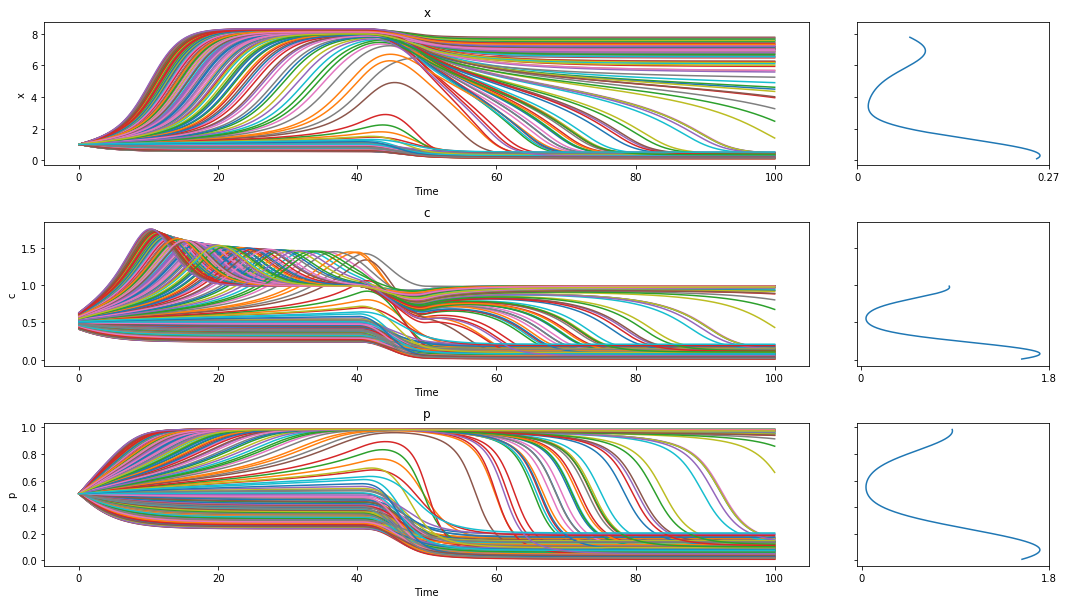

In [19]:
figure = emaplt.lines(results,density=u'kde') #show lines, and end state density
plt.rcParams["figure.figsize"] = (18,10)
plt.show() #show figure

In [20]:
#experiments, outcomes = results
#print(experiments) #<class 'numpy.ndarray'>
#print(type(experiments.item(2))) #<class 'tuple'>

#experiments is an array of tuples, where each tuple is one experiment input set

In [21]:
#print(type(outcomes)) #<class 'dict'>
#print(type(outcomes['Deceased Population'])) #<class 'numpy.ndarray'>
#print(type(outcomes['Deceased Population'][1])) #<class 'numpy.ndarray'>
#print(type(outcomes['Deceased Population'][1].item(1))) #<class 'float'>


'''outcomes is a dict of output variables (key) and output value arrays (value), where each output value array has
the shape (number of runs) * (run duration / time step = total steps). Each run (or row) is an array of floats,
where each row is the time series output of a specific simulation run for the associated variable, and each float
is the value of that variable at a specific step or time in the simulation run.'''


'outcomes is a dict of output variables (key) and output value arrays (value), where each output value array has\nthe shape (number of runs) * (run duration / time step = total steps). Each run (or row) is an array of floats,\nwhere each row is the time series output of a specific simulation run for the associated variable, and each float\nis the value of that variable at a specific step or time in the simulation run.'

In [22]:
export_outcomes(outcomes)

'Done.'

In [23]:
print(experiments)

[(0.5110041 , 0.34326298, 200, 'None', 'StrogatzBudworms')
 (0.56913258, 0.20328204, 201, 'None', 'StrogatzBudworms')
 (0.65126375, 0.3914987 , 202, 'None', 'StrogatzBudworms')
 (0.61176335, 0.38806531, 203, 'None', 'StrogatzBudworms')
 (0.49228801, 0.14417623, 204, 'None', 'StrogatzBudworms')
 (0.55602203, 0.35313559, 205, 'None', 'StrogatzBudworms')
 (0.62556197, 0.21190076, 206, 'None', 'StrogatzBudworms')
 (0.60557827, 0.16845616, 207, 'None', 'StrogatzBudworms')
 (0.61721614, 0.27959081, 208, 'None', 'StrogatzBudworms')
 (0.49375425, 0.31631968, 209, 'None', 'StrogatzBudworms')
 (0.6160347 , 0.33106401, 210, 'None', 'StrogatzBudworms')
 (0.52025322, 0.33698776, 211, 'None', 'StrogatzBudworms')
 (0.60215715, 0.22745688, 212, 'None', 'StrogatzBudworms')
 (0.65575199, 0.22853243, 213, 'None', 'StrogatzBudworms')
 (0.59190929, 0.26163366, 214, 'None', 'StrogatzBudworms')
 (0.54434607, 0.18870095, 215, 'None', 'StrogatzBudworms')
 (0.5797186 , 0.29487533, 216, 'None', 'StrogatzBudworms

In [24]:
df_expt = pd.DataFrame(experiments)
df_expt = df_expt.copy()
df_expt.iloc[:,0:2].head()

,r0,rstep
0,0.511004,0.343263
1,0.569133,0.203282
2,0.651264,0.391499
3,0.611763,0.388065
4,0.492288,0.144176


In [25]:
import datetime
df_expt = pd.DataFrame(experiments) #convert experiments (array of tuples) into df
df_expt = df_expt.copy() #self-copy to circumvent errors
path = "./Data/" + str(datetime.date.today()) + "Experiments" + '.feather' #create path for saving
feather.write_dataframe(df_expt.iloc[:,0:2],path) #feather it!

In [28]:
outcomes["x"]

array([[1.        , 0.99501663, 0.99009097, ..., 0.16966966, 0.16966909,
        0.16966854],
       [1.        , 1.00152326, 1.00303805, ..., 0.40977386, 0.40977386,
        0.40977386],
       [1.        , 1.01078212, 1.0215981 , ..., 0.27145073, 0.27144712,
        0.27144364],
       ...,
       [1.        , 0.99714273, 0.99431288, ..., 0.13198903, 0.13198696,
        0.13198492],
       [1.        , 1.00621796, 1.012429  , ..., 6.00112009, 6.00102377,
        6.0009284 ],
       [1.        , 1.00113654, 1.00226641, ..., 0.50952011, 0.50952011,
        0.50952011]])

In [53]:
experiments

array([(0.5110041 , 0.34326298, 200, 'None', 'StrogatzBudworms'),
       (0.56913258, 0.20328204, 201, 'None', 'StrogatzBudworms'),
       (0.65126375, 0.3914987 , 202, 'None', 'StrogatzBudworms'),
       (0.61176335, 0.38806531, 203, 'None', 'StrogatzBudworms'),
       (0.49228801, 0.14417623, 204, 'None', 'StrogatzBudworms'),
       (0.55602203, 0.35313559, 205, 'None', 'StrogatzBudworms'),
       (0.62556197, 0.21190076, 206, 'None', 'StrogatzBudworms'),
       (0.60557827, 0.16845616, 207, 'None', 'StrogatzBudworms'),
       (0.61721614, 0.27959081, 208, 'None', 'StrogatzBudworms'),
       (0.49375425, 0.31631968, 209, 'None', 'StrogatzBudworms'),
       (0.6160347 , 0.33106401, 210, 'None', 'StrogatzBudworms'),
       (0.52025322, 0.33698776, 211, 'None', 'StrogatzBudworms'),
       (0.60215715, 0.22745688, 212, 'None', 'StrogatzBudworms'),
       (0.65575199, 0.22853243, 213, 'None', 'StrogatzBudworms'),
       (0.59190929, 0.26163366, 214, 'None', 'StrogatzBudworms'),
       (0.

In [47]:
type(experiments)

numpy.ndarray

In [51]:
type(experiments[3])

numpy.void

In [57]:
experiments.getfield

<function ndarray.getfield>

In [58]:
experiments.shape

(200,)

In [59]:
experiments[3][2]

203